<a href="https://colab.research.google.com/github/adishukla2009/PGP-ML-Course/blob/SVM-Project/SVM_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SuperVised Machine Learning Project

## Data Description and Context:
The file Bank.xls contains data on 5000 customers. The data include customer
demographic information (age, income, etc.), the customer's relationship with the bank
(mortgage, securities account, etc.), and the customer response to the last personal loan
campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted
the personal loan that was offered to them in the earlier campaign.

This case is about a bank (**Thera Bank**) whose management wants to explore ways of
converting its liability customers to personal loan customers (while retaining them as
depositors). A campaign that the bank ran last year for liability customers showed a
healthy conversion rate of over 9% success. This has encouraged the retail marketing
department to devise campaigns with better target marketing to increase the success
ratio with minimal budget.

# Learning Outcomes and Objective

## Learning Outcomes:


*   Exploratory Data Analysis
*   Preparing the data to train a model
*   Training and making predictions using a classification model
*   Model evaluation

## Objective:
The classification goal is to predict the likelihood of a liability customer buying personal
loans.


Below we are importing all the libraries and modules that we are going to be using for this exercise. The libraries would be the ones used for Data manipulation, Modelling and Plotting 

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Loading the data 

In [2]:
Data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
Data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


##**Attribute Information:**

Looking at the data head, we can see the following columns -

*   ID : Customer ID
*   Age : Customer's age in completed years
*   Experience : #years of professional experience
*   Income : Annual income of the custome(000's dollars)
*   ZIP Code : Home Address ZIP code.
*   Family : Family size of the customer
*   CCAvg : Avg. spending on credit cards per month (000's dollars)
*   Education : Education Level. 1: Undergrad; 2: Graduate;
 3: Advanced/Professional
*   Mortgage : Value of house mortgage if any. (000's dollars)
*   Personal Loan : Did this customer accept the personal loan offered in the
 last campaign?
*   Securities Account : Does the customer have a securities account with the bank?
*   CD Account : Does the customer have a certificate of deposit (CD)
 account with the bank?
*   Online : Does the customer use internet banking facilities?

In [3]:
Data.shape

(5000, 14)

The Data has 5000 rows and 14 attributes 

In [4]:
print (Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None


**Observation** : All the attributes are not null and hence there are no missing values in the Data 

Also ID and ZIP Code are Nominal Variables and need to be changed to String 

In [5]:
Data[['ID','ZIP Code']] = Data[['ID','ZIP Code']].astype('str')
print (Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   object 
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   object 
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 547.0+ KB
None


In [6]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


**Observation** : The most important observation from the above operation was that the minimum value for Experience atribute is negative - which should not be the case and seems like we need to perform some data cleansing

In [7]:
Data.apply(lambda x:len(x.unique()))

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

## **Univariate Analysis**

We would first look at the frequency distribution of numerical attributes and then for the ordinal and categorical ones  



## Frequency distribution of Numerical attributes 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0a3a31d30>,
      dtype=object)

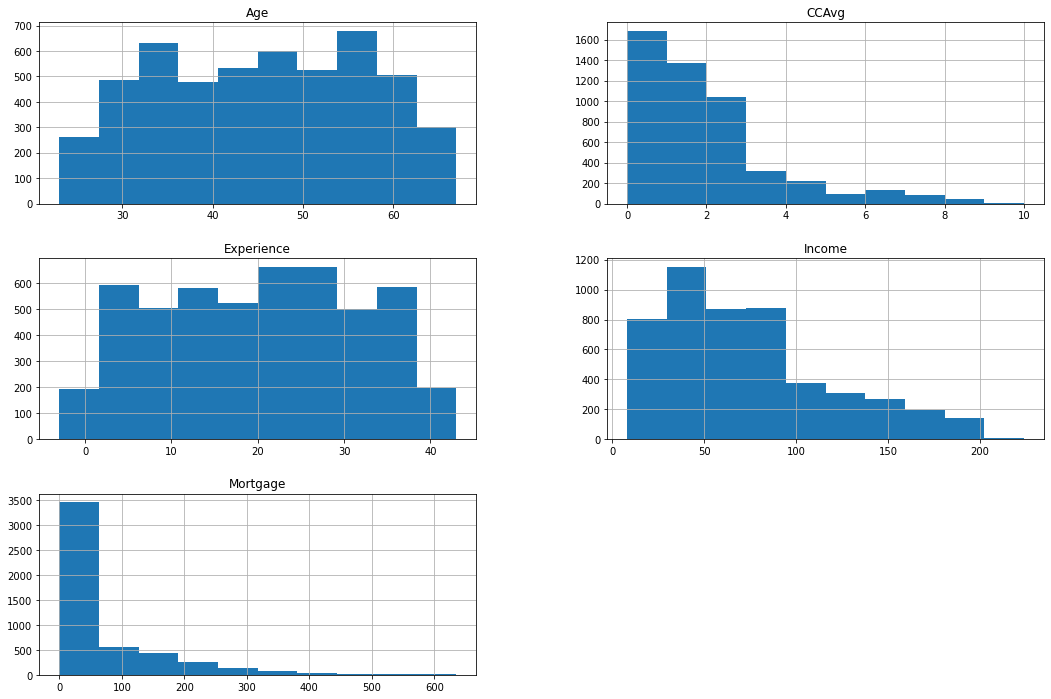

In [8]:
Data.hist(column=['Age', 'Experience','Income','CCAvg','Mortgage'],figsize=(18,12))

**Observation** - 

*   There is a fairly normal distribution of Age looking at the chart and the 
Mean and median in the 'Describe' operation


*   Also,  Expeience shows a normal distribution looking at the chart and the mean/meadian cvalues.  But we do see that few data points have experience as 'negative' and should be corrected 




*   Income is positive skewed - A majority of people have income around 50k but the mean is greater than the median showing skewness in data 



*   CCAvg is positive skewed - A majority of people have average spend of less than 2000$ but the mean is greater than the median showing skewness in data 



*   Mortgage - a majority of people do not have a mortgage but the range is very wide and we can see having a max value of 635k












## Frequency distribution of Categorical and Ordinal attributes 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0a330bfd0>,
      dtype=object)

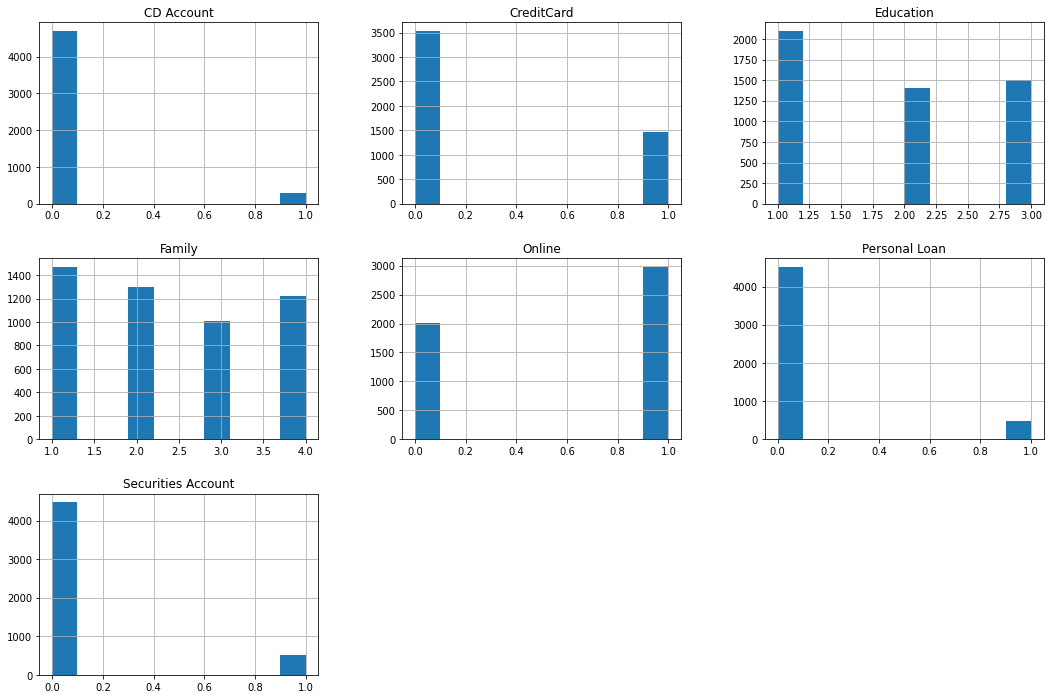

In [9]:
Data.hist(column=['Family', 'Education','Personal Loan','Securities Account','CD Account','Online','CreditCard'],figsize=(18,12))

### **Observation**

*   The distribution between classes in CD account, Securities Account and Personal loan is highly uneven. 

*   Also the frequency for the attributes - Family , Education and Online is pretty much evenly distributed 






# **Data Cleansing** 

For Data cleansing we would perform three major operations 
*   Find if there are any **missing values** - If present, either remove the whole observation or fill it appropriately
*   Find any **irregularities** in the data and correct them appropriately 







### Finding missing values 

As we have seen earlier as well when we were trying to understand the structure and collect some information about our data that there are no missing values. However, below we are trying to visualize our data for any missing values. 

**Observation** - Looking at the heatmap, Since we are not seeing any lines and only a homogenous green, we can say that there are no misisng values 

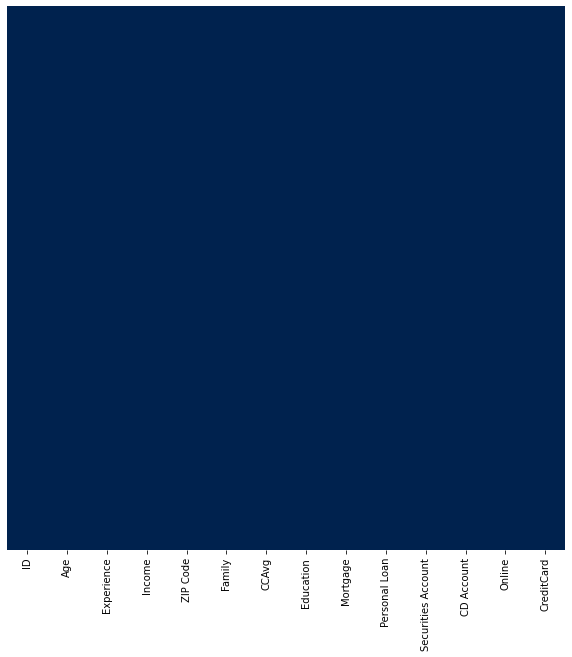

In [10]:
f, ax = plt.subplots(figsize=(10, 10))
ax=sns.heatmap(Data.isna(),yticklabels=False,cbar=False,cmap='cividis')

## Finding irregularities in data (like negative values)

Earlier we found that there are some negative values in the "Experience" column - Let us visualize our data for these negative values 

We would make a copy of our data and exchange the negative numbers with null values so that we can plot them on the heatmap

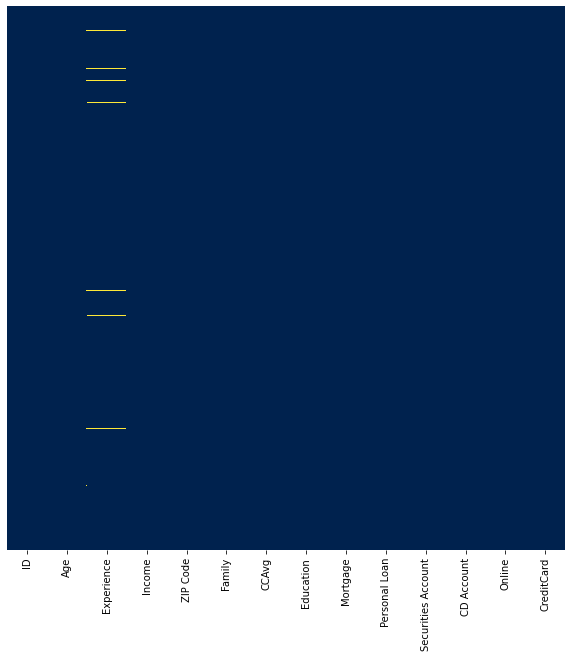

In [11]:
Copied_data = Data.copy()
def Change_negative_to_null(x):
    if x<0:
        return np.NaN
    else:
        return x
Copied_data['Experience'] = Copied_data['Experience'].apply(Change_negative_to_null)

f, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(Copied_data.isna(),yticklabels=False,cbar=False,cmap='cividis') 

### **Replacing the negative values** 

We would follow the below mentioned steps to get rid of the negative values 

*   Look if there is a correlation between experience and other continuous attributes 
*   If there is a correlation then use that attribute to find the mean 'experience' and replace - If there is no correlation then either replace with a mean of 'experience' column or delete the entire row

> Indented block





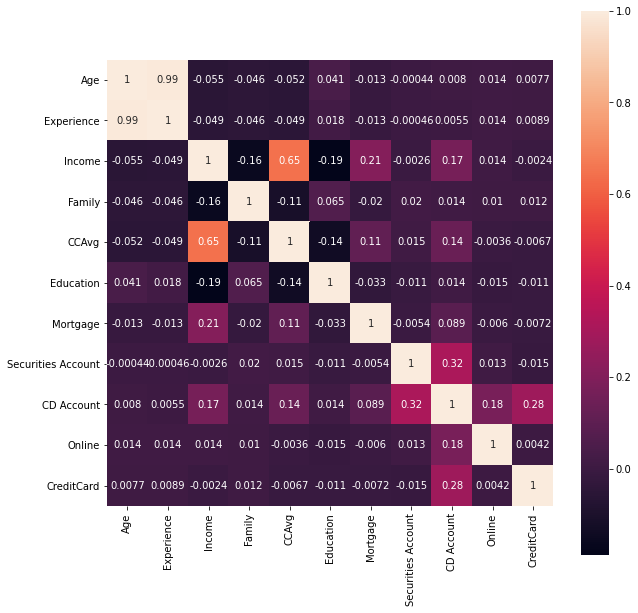

In [12]:
Copied_data = Copied_data.drop(['ID','Personal Loan','ZIP Code'], axis=1)
corr = Copied_data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr,annot=True,square=True)

### **Observation** 

Looking at the correlation heatmap we see that Age and Experience have a very high correlation 

So, we would like to replace the negative values by using Age attribute as follows 



*   Firstly, find out the indices where negative values reside 
*   Find the corresponding Age for these data points 
*   For every such Age find the mean 'Experience' and replace in the original Dataframe


In [0]:
# Firstly Find out the indices where the Negative values reside and put them in a list

Neg_Value_index = Data[Data['Experience']<0].index.tolist()

In [14]:
# Find the unique values of Ages for all these Negative Experience data points 

Unique_Ages=Data[Data['Experience']<0]['Age'].unique().tolist()
print(Unique_Ages)

[25, 24, 28, 23, 29, 26]


In [0]:
# Traverse the Indexes one by one and for every Age in the list replace the Experience column by the mean of Experience for that particular age 

for i in Neg_Value_index:
  for j in Unique_Ages:
    Data.loc[i,'Experience'] = Data[(Data.Age == j) & (Data.Experience > 0)].Experience.mean()

In [16]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.135743,11.413140,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


### **Result**

The data is free of negative values for Experience attribute and is replaced by appropriate values 


# **Multivariate Analysis**

For multivariate analysis we would be doing the following - 


*   Create Box Plot seeing how different attributes can be differentiated on the basis of Personal loan 
*   We will look at the pairplot of all the attributes and try to find out any patterns 


*   Lastly we will look at the correlation heatmap of attributes to find which attributes have a good association with Personal loan





### Influence of Income and Education on Personal Loan

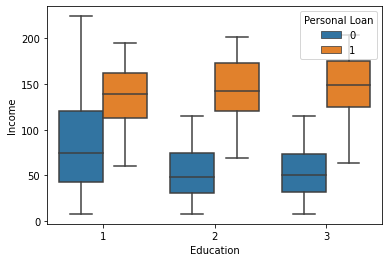

In [18]:
sns.boxplot(x='Education', y='Income',hue='Personal Loan',data= Data )

### Observation 
The Median Income for the Group 1 is higher than the other two where the people have not opted for the loan 

The population which has opted for the loan have a similar median income for all Education groups which is higher than that of the population which has not opted for the loan 

Inference - There might be some relationship between income and opting for personal loan

### Influence of Education and Mortgage on Personal Loan

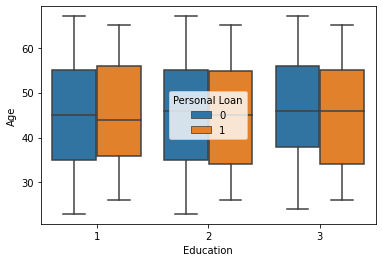

In [19]:
sns.boxplot(x='Education', y='Age',hue='Personal Loan',data= Data )

### Observation 
There is almost no difference in Age across different Education categories and also the median age for personal loan does not vary with Education

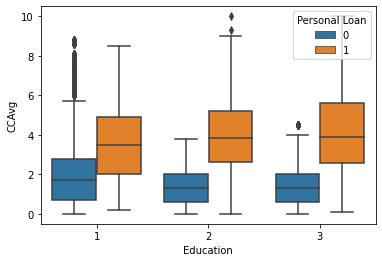

In [20]:
sns.boxplot(x='Education', y='CCAvg',hue='Personal Loan',data= Data )

### Observation 
For the Education category 1 - the median CCAvg is higher than the other two categories but only among the people who have not opted for Personal loan

For Eductaion category 1 - The median CCAvg is lower than other two categories for the people who have opted for personal loan 

This suggests that people in Education category 1 and opting for Personal loan have a lower Credit Card Spend per month

## **Multivariate Analysis Pairplot**

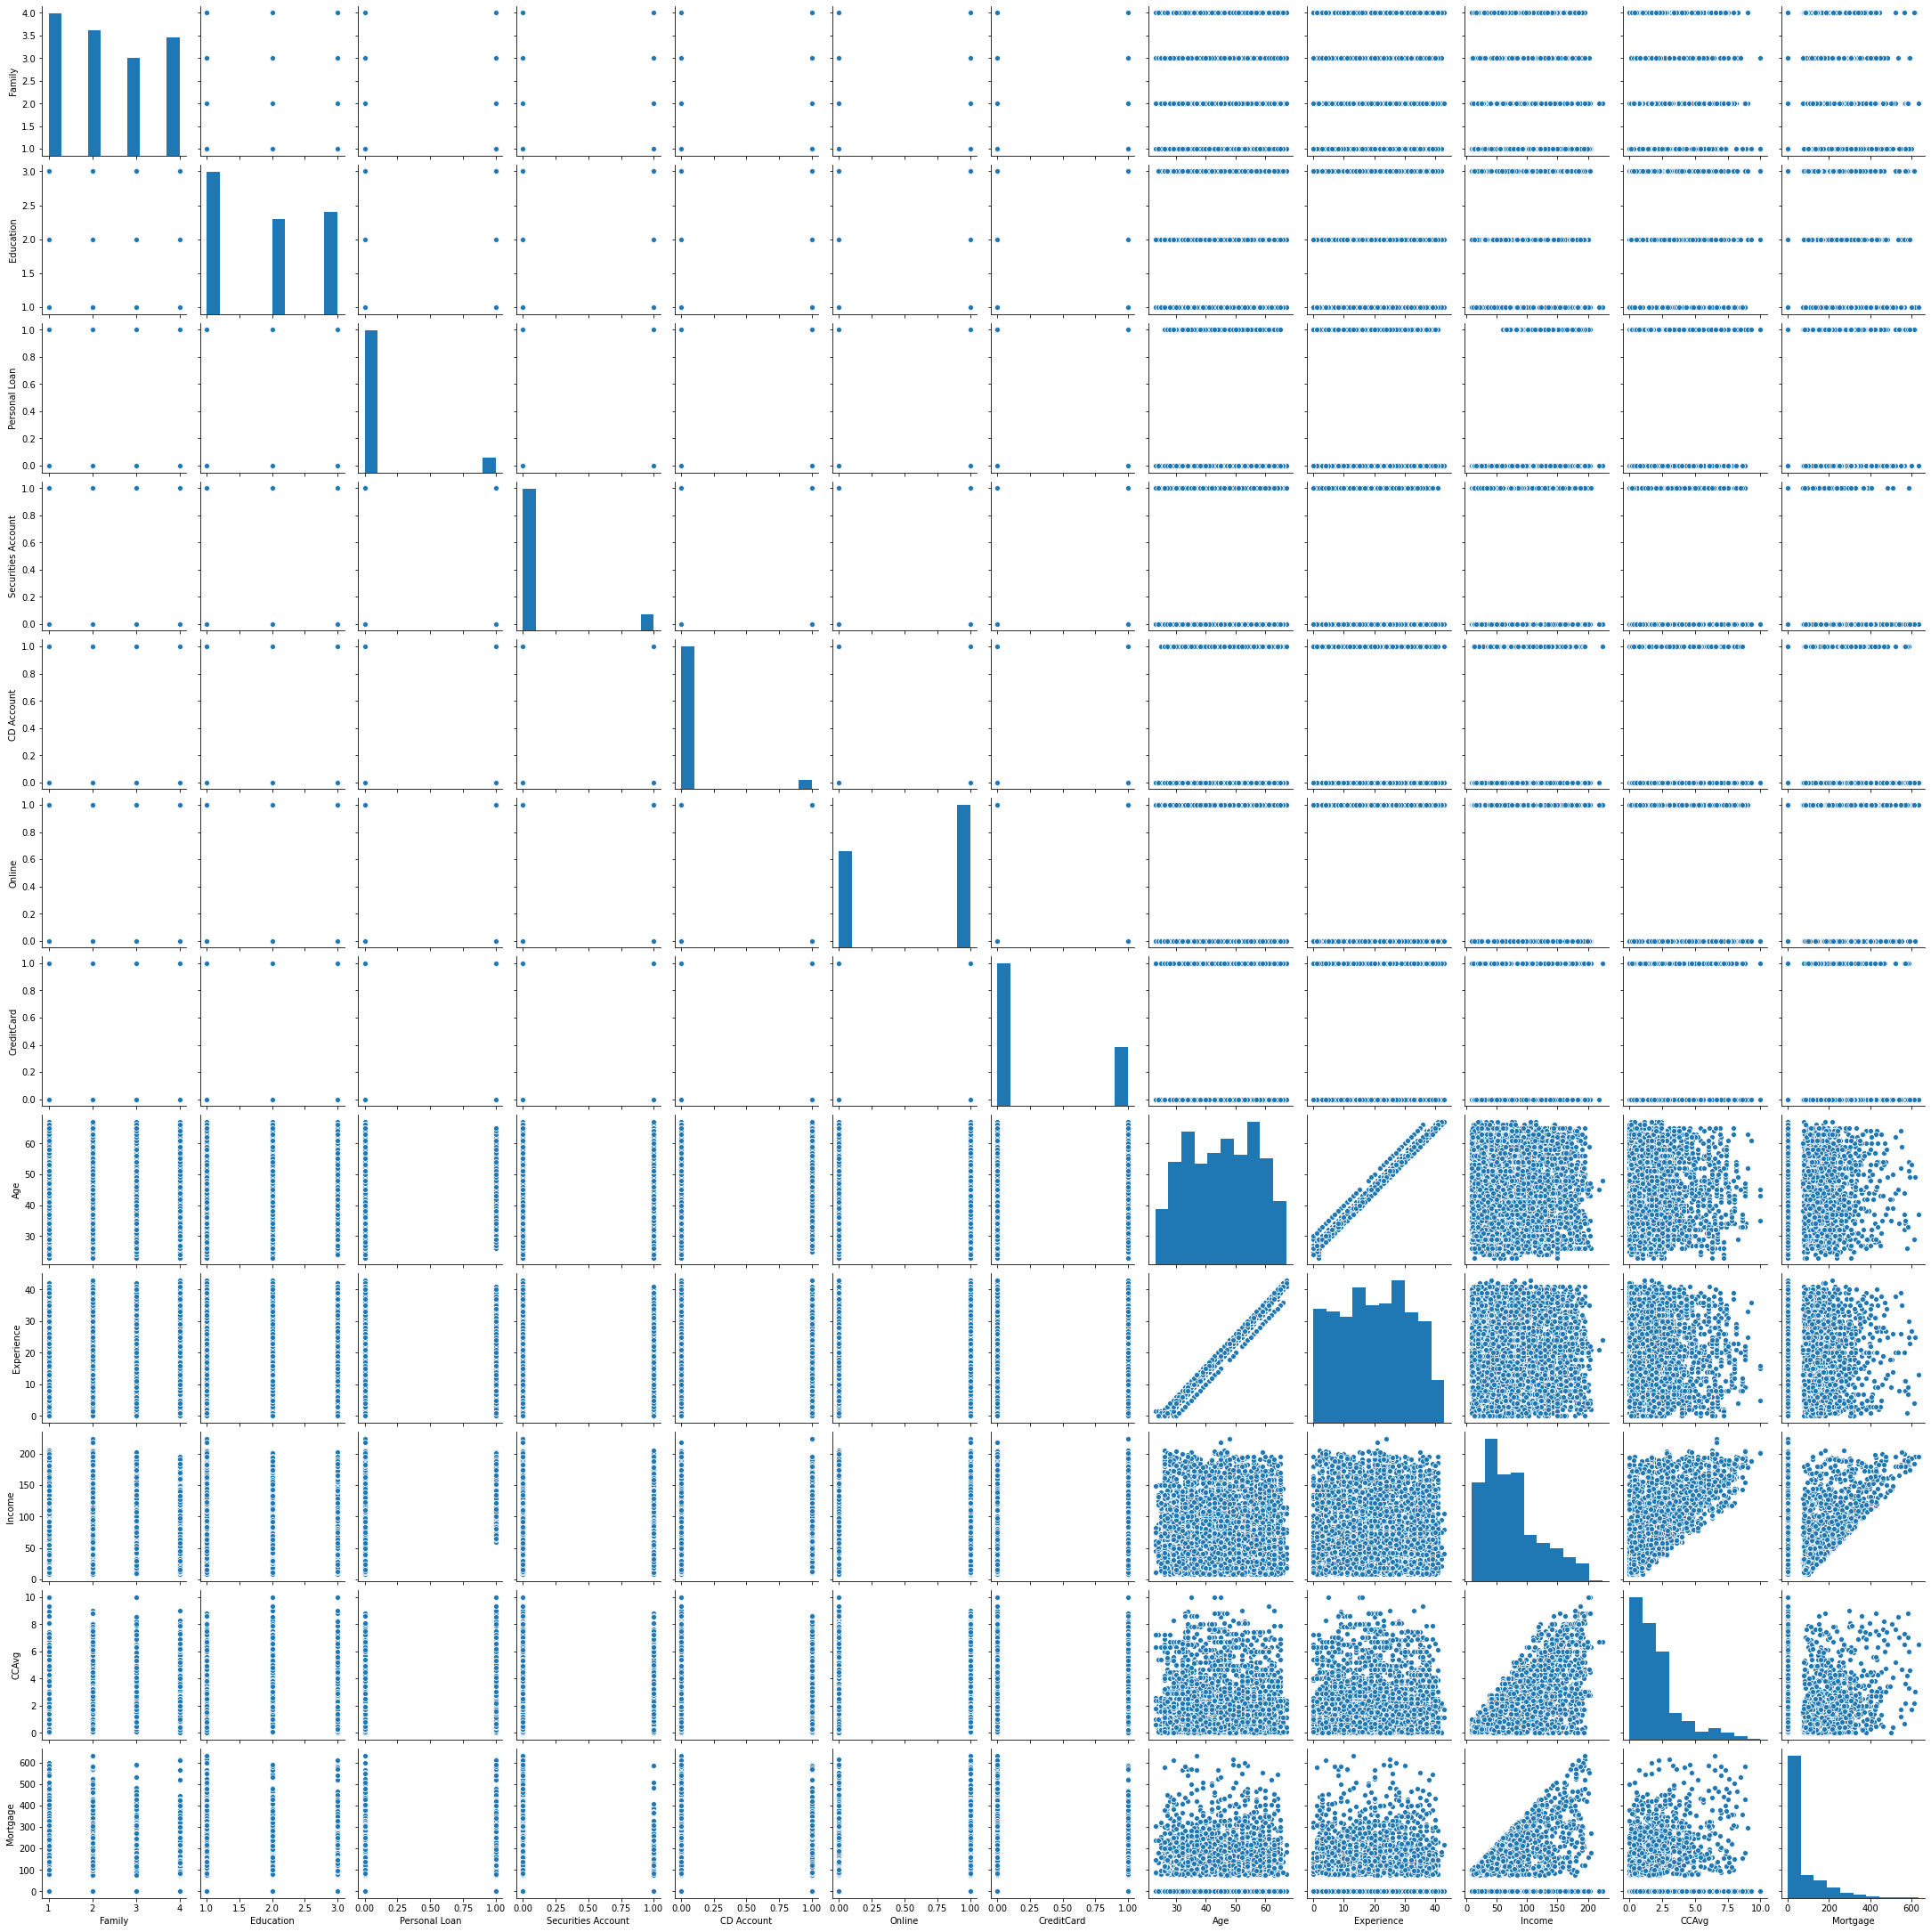

In [21]:
sns.pairplot(Data,vars=['Family', 'Education','Personal Loan','Securities Account','CD Account','Online','CreditCard','Age', 'Experience','Income','CCAvg','Mortgage'])

### Observation 

Looking at the scatterplots for Age and Experience - there exists a strong correlation between the two as suggested earlier as well 

There exists some relatonship between Mortgage and income looking at the pattern which shows an increase in Mortgage with increasing income but only an upper limit can be inferred and the Mortgage can be aywhere between 0 and the upper limit

Also, there may be some relationship between CCAvg and Income as there is a unique pattern of the scatterplot which shows an increase in CCAVg with increasing income but only an upper limitcan be inferred and CCAvg can be aywhere between 0 and the upper limit

## **Correlation Heatmap**

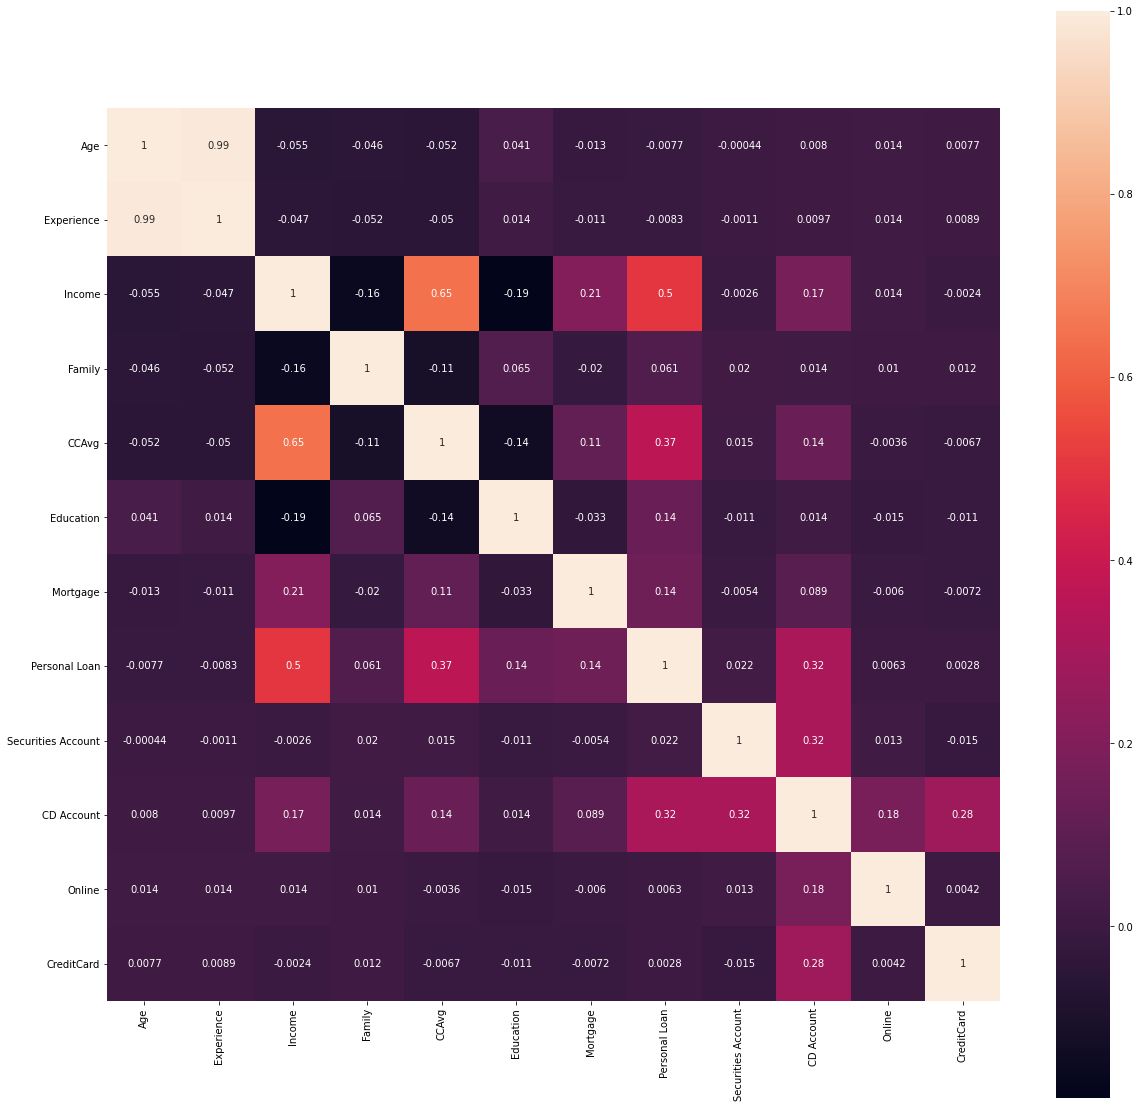

In [22]:
corr = Data.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr,annot=True,square=True)

## **Observation** 

Looking at the heatmap above , we can infer - 


*   There exists a weak correlation between Personal loan and Income at 0.5 
*   Also, the next two attributes having some correlation with Personal loand are CCAvg and CD Account but it is a very low value 0.37 and 0.32 respectively

*   Age and Experience are highly correlated at 0.99 but are not at all correlated to Personal Loan and might not be useful for our modelling 
*   Another correlation worth taking note is between CCAVg and Income at 0.65 








## **Normalize the data**

Firstly we will normalize the data by making the Mean as 0 and Standard deviation as 1 for all the values 

In [124]:
Data_scaled = Data.drop(['ID','ZIP Code'], axis=1)
Data_scaled = Data_scaled.apply(zscore)
Data_scaled.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,2.478018e-17,3.179679e-17,1.939449e-16,7.850609e-16,-2.078338e-17,-6.315837e-16,2.810197e-16,-5.565326e-16,5.092149e-16,4.426903e-16,2.986500e-16,-3.697931e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.948906e+00,-1.764436e+00,-1.428969e+00,-1.216855e+00,-1.108987e+00,-1.049078e+00,-5.555239e-01,-3.258753e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01
25%,-9.019702e-01,-8.881655e-01,-7.554825e-01,-1.216855e+00,-7.084116e-01,-1.049078e+00,-5.555239e-01,-3.258753e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01
50%,-2.952359e-02,-1.189477e-02,-2.123482e-01,-3.454321e-01,-2.506106e-01,1.417029e-01,-5.555239e-01,-3.258753e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,-6.453143e-01
75%,8.429230e-01,8.643759e-01,5.263146e-01,5.259909e-01,3.216407e-01,1.332484e+00,4.375576e-01,-3.258753e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,1.549632e+00
max,1.889859e+00,2.003528e+00,3.263712e+00,1.397414e+00,4.613525e+00,1.332484e+00,5.688108e+00,3.068659e+00,2.928915e+00,3.944146e+00,8.219509e-01,1.549632e+00


# **Splitting train and test data**

We would be splitting the test and train data randomly (70% train and 30% test and would be using a fixed random state so that we get comparable results with every run 

In [125]:
from sklearn.model_selection import train_test_split
X = Data_scaled.drop('Personal Loan', axis=1)
Y = Data['Personal Loan']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)
x_train.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,0.144966,0.163359,-0.842384,-0.345432,-0.365061,-1.049078,-0.555524,-0.341423,-0.25354,0.821951,-0.645314
4768,-0.640236,-0.537657,-0.755483,-1.216855,0.035515,0.141703,-0.555524,-0.341423,-0.25354,0.821951,-0.645314
65,1.191902,1.302511,1.243252,-1.216855,1.065567,-1.049078,-0.555524,-0.341423,-0.25354,0.821951,1.549632
177,-1.425438,-1.501555,-0.190623,1.397414,-0.078935,0.141703,1.843604,-0.341423,-0.25354,-1.216618,-0.645314
4489,-0.552992,-0.625284,-1.146539,0.525991,-0.994537,0.141703,-0.555524,-0.341423,-0.25354,0.821951,-0.645314


### Let us check the split of the data 

In [126]:
print('{0:0.2f}% data is in the training set '.format ((len(x_train)/len(Data.index)) *100))
print('{0:0.2f}% data is in the training set '.format ((len(x_test)/len(Data.index)) *100))

70.00% data is in the training set 
30.00% data is in the training set 


In [127]:
print("Number of people opting for Personal Loan in Original data   : {0} ({1:0.2f}%)".format(len(Data.loc[Data['Personal Loan'] == 1]), (len(Data.loc[Data['Personal Loan'] == 1])/len(Data.index)) * 100))
print("Number of people not opting for Personal Loan in Original data   : {0} ({1:0.2f}%)".format(len(Data.loc[Data['Personal Loan'] == 0]), (len(Data.loc[Data['Personal Loan'] == 0])/len(Data.index)) * 100))
print("")
print("Number of people opting for Personal Loan in Training data    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Number of people Not opting for Personal Loan in Training data    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Number of people opting for Personal Loan in Test data          : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Number of people Not opting for Personal Loan in Test data       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Number of people opting for Personal Loan in Original data   : 480 (9.60%)
Number of people not opting for Personal Loan in Original data   : 4520 (90.40%)

Number of people opting for Personal Loan in Training data    : 331 (9.46%)
Number of people Not opting for Personal Loan in Training data    : 3169 (90.54%)

Number of people opting for Personal Loan in Test data          : 149 (9.93%)
Number of people Not opting for Personal Loan in Test data       : 1351 (90.07%)



# **Logistic Regression Model**

In [236]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3  ...        8       9        10  intercept
0 -0.039786  0.091823  2.312174  0.780648  ...  0.87215 -0.2866 -0.498954  -4.569831

[1 rows x 12 columns]


In [237]:
model_score_train = model.score(x_train, y_train)
print('The Accuracy of the model on training data set is ', model_score_train)
model_score_test = model.score(x_test, y_test)
print('The Accuracy of the model on test data set is ', model_score_test)

The Accuracy of the model on training data set is  0.9531428571428572
The Accuracy of the model on test data set is  0.9486666666666667


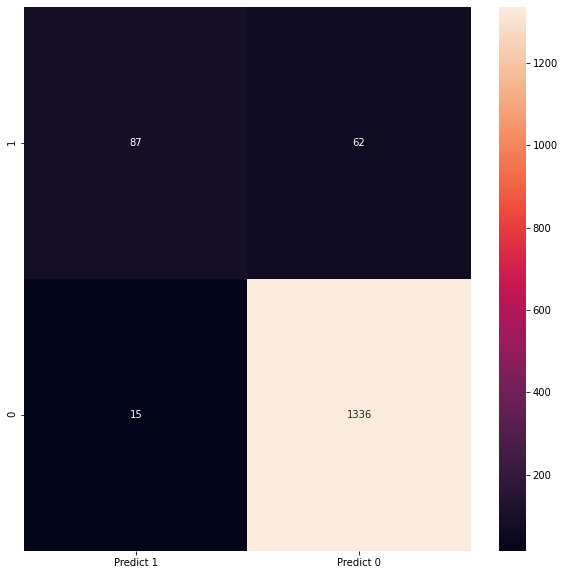

In [238]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (10,10))
sns.heatmap(df_cm, annot=True, fmt='g')

The confusion matrix

True Positives (TP): we correctly predicted that the people who opted for Personal Loan  87

True Negatives (TN): we correctly predicted that these people have not opted for Personal Loan 1336

False Positives (FP): we incorrectly predicted that these people opeted for Personal Loan (a "Type I error") 15 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that These people have not opted for a personal loan (a "Type II error") 62 Falsely predict negative Type II error

In [260]:
print("Classification Report")
print(metrics.classification_report(y_test, y_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.85      0.58      0.69       149
           0       0.96      0.99      0.97      1351

    accuracy                           0.95      1500
   macro avg       0.90      0.79      0.83      1500
weighted avg       0.95      0.95      0.94      1500



## **Naive Bayes Classifier**


In [245]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
Loan_model = GaussianNB()

Loan_model.fit(x_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

### Performance of our model with training data

In [246]:
Loan_train_predict = Loan_model.predict(x_train)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, Loan_train_predict)))
print()

Model Accuracy: 0.8900



### Performance of our model with testing data

In [247]:
Loan_test_predict = Loan_model.predict(x_test)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, Loan_test_predict)))
print()

Model Accuracy: 0.8747



### Lets check the confusion matrix and classification report

Confusion Matrix


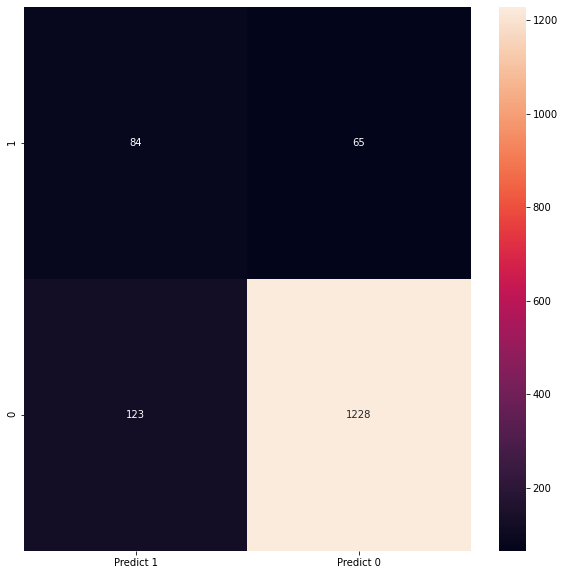

In [248]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, Loan_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (10,10))
sns.heatmap(df_cm, annot=True, fmt='g')

The confusion matrix

True Positives (TP): we correctly predicted that the people who opted for Personal Loan  84

True Negatives (TN): we correctly predicted that these people have not opted for Personal Loan 1228

False Positives (FP): we incorrectly predicted that these people opeted for Personal Loan (a "Type I error") 123 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that These people have not opted for a personal loan (a "Type II error") 65 Falsely predict negative Type II error

In [254]:
print("Classification Report")
print(metrics.classification_report(y_test, Loan_test_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.41      0.56      0.47       149
           0       0.95      0.91      0.93      1351

    accuracy                           0.87      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.87      0.88      1500



## K Nearest Neighbours

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )


In [256]:
NNH.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [257]:
train_Labels =NNH.predict(x_train)
print(NNH.score(x_train, y_train))
predicted_labels = NNH.predict(x_test)
print(NNH.score(x_test, y_test))

1.0
0.954


Confusion Matrix


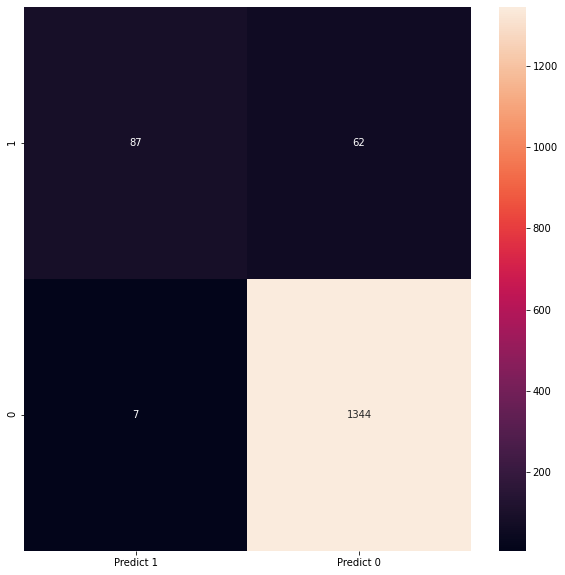

In [258]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=[1 ,0])

df_cm = pd.DataFrame(cm, index = [i for i in [1,0]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (10,10))
sns.heatmap(df_cm, annot=True,fmt='g')

The confusion matrix

True Positives (TP): we correctly predicted that the people who opted for Personal Loan  87

True Negatives (TN): we correctly predicted that these people have not opted for Personal Loan 1344

False Positives (FP): we incorrectly predicted that these people opeted for Personal Loan (a "Type I error") 62 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that These people have not opted for a personal loan (a "Type II error") 7 Falsely predict negative Type II error

In [259]:
print("Classification Report")
print(metrics.classification_report(y_test, predicted_labels, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.93      0.58      0.72       149
           0       0.96      0.99      0.97      1351

    accuracy                           0.95      1500
   macro avg       0.94      0.79      0.85      1500
weighted avg       0.95      0.95      0.95      1500



# **Model Evaluation**

Firstly looking at the **accuracy**

*   Logistic Regression -  94.86 %
*   Naive Bayes Classifier - 87.47 %
*   K Nearest Neighbours - **95.4 %**

Since we have an imbalanced dataset even so the accuracy is not the correct metric to judge the models 

Now We can look at the Confusion metrices and the most important factor to look at the people which the model has predicted as would not opt for loan and in reality have. This is the **False Negative** 

Looking at the models - All have a similar **False negative number at around 62 or 63**


To further evaluate we can use the classification report which we generated for all the models 



**Logistic Regression**

Classification Report

              precision    recall  f1-score   support

           1       0.85      0.58      0.69       149
           0       0.96      0.99      0.97      1351

**Naive Bayes Classifier** 

Classification Report

              precision    recall  f1-score   support

           1       0.41      0.56      0.47       149
           0       0.95      0.91      0.93      1351


**K Nearest Neighbours**

Classification Report

              precision    recall  f1-score   support

           1       0.93      0.58      0.72       149
           0       0.96      0.99      0.97      1351





# **Final Comments**

Looking at the precision recall and F1 score - **K nearest neighbours looks like a better model out of the three**

The values for the three metrics are same for people who did not opt Personal Loan with that of Logistic regression

But the model has done better than other when it comes on predicting People who have opted for Personal Loan

**Why KNN is doing better here?**

Since the data we were given had a few outliers in attributes like Mortgage and CCAvg but could not be deleted as they were part of original data and was not a data-entry issue 
KNN helps to fit a model better in case of outliers - Better than the other algorithms 

Also, Since there was not a lot of correlation seen between the attributes - KNN performs better 